# Afrobeats Recommender

# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
from sklearn.decomposition import PCA

from scipy import sparse
import plotly.express as px
import time

#### Import Ankita's Playlist

In [4]:
ankita= pd.read_csv('../data/ankita.csv')
ankita.head(2)

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,068HSvCf5MbQfhV4qqaelg,"Haan Main Galat (From ""Love Aaj Kal"")",Pritam,1wRPtKGflJrBx9BmLsSwlU,"Haan Main Galat (From ""Love Aaj Kal"")",64,0.685,0.736,0,-5.656,...,0.893,117.979,audio_features,068HSvCf5MbQfhV4qqaelg,spotify:track:068HSvCf5MbQfhV4qqaelg,https://api.spotify.com/v1/tracks/068HSvCf5MbQ...,https://api.spotify.com/v1/audio-analysis/068H...,218644,4,ankita
1,2aHz87L2Z4a0ZEQ7vMlH8z,Badal Pe Paon Hai,Salim–Sulaiman,6ohaQzKaXrobAL8paLSaxq,Chak De India,57,0.649,0.788,9,-9.607,...,0.869,104.999,audio_features,2aHz87L2Z4a0ZEQ7vMlH8z,spotify:track:2aHz87L2Z4a0ZEQ7vMlH8z,https://api.spotify.com/v1/tracks/2aHz87L2Z4a0...,https://api.spotify.com/v1/audio-analysis/2aHz...,243931,4,ankita


In [5]:
ankita.shape

(8, 25)

In [6]:
afrobeats = pd.read_csv('../data/afrobeats.csv')
afrobeats.head(2)

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,1sSt1DqqqFLkPwfrqafVyn,Oleku (feat. Brymo),51,0.544,0.730,1,-4.299,...,0.751,162.112,audio_features,0mDRuZmReEm6DquPLJlcEm,spotify:track:0mDRuZmReEm6DquPLJlcEm,https://api.spotify.com/v1/tracks/0mDRuZmReEm6...,https://api.spotify.com/v1/audio-analysis/0mDR...,291364,5,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,37zb1JQnDV9dRLatrASEj1,Move Back,45,0.793,0.734,11,-9.252,...,0.793,125.032,audio_features,1tvi8tv0eykhNcV1WtaIqO,spotify:track:1tvi8tv0eykhNcV1WtaIqO,https://api.spotify.com/v1/tracks/1tvi8tv0eykh...,https://api.spotify.com/v1/audio-analysis/1tvi...,237107,4,afrobeats


In [7]:
afrobeats.shape

(1500, 25)

In [8]:
df = pd.concat([afrobeats, ankita])

In [9]:
df.reset_index(inplace=True, drop=True)

In [10]:
df.head()

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,1sSt1DqqqFLkPwfrqafVyn,Oleku (feat. Brymo),51,0.544,0.730,1,-4.299,...,0.751,162.112,audio_features,0mDRuZmReEm6DquPLJlcEm,spotify:track:0mDRuZmReEm6DquPLJlcEm,https://api.spotify.com/v1/tracks/0mDRuZmReEm6...,https://api.spotify.com/v1/audio-analysis/0mDR...,291364,5,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,37zb1JQnDV9dRLatrASEj1,Move Back,45,0.793,0.734,11,-9.252,...,0.793,125.032,audio_features,1tvi8tv0eykhNcV1WtaIqO,spotify:track:1tvi8tv0eykhNcV1WtaIqO,https://api.spotify.com/v1/tracks/1tvi8tv0eykh...,https://api.spotify.com/v1/audio-analysis/1tvi...,237107,4,afrobeats
2,5YgyvTZmdkIfFOnj8ri8mZ,Pakurumo,WizKid,3tVQdUvClmAT7URs9V3rsp,Superstar,49,0.879,0.737,2,-5.412,...,0.967,119.990,audio_features,5YgyvTZmdkIfFOnj8ri8mZ,spotify:track:5YgyvTZmdkIfFOnj8ri8mZ,https://api.spotify.com/v1/tracks/5YgyvTZmdkIf...,https://api.spotify.com/v1/audio-analysis/5Ygy...,212006,4,afrobeats
3,2cWdhA4ZDBvYuHRKKIPT3k,The Matter (feat. Wizkid),Maleek Berry,520qA5VGL9iI0SbmEnTVNg,The Matter (feat. Wizkid),49,0.697,0.841,2,-6.782,...,0.808,103.070,audio_features,2cWdhA4ZDBvYuHRKKIPT3k,spotify:track:2cWdhA4ZDBvYuHRKKIPT3k,https://api.spotify.com/v1/tracks/2cWdhA4ZDBvY...,https://api.spotify.com/v1/audio-analysis/2cWd...,198058,4,afrobeats
4,4voOsb8qpJ569JaMiGAyrl,Slow Down (feat. Wiz Kid),R2Bees,0LFsP7WPfu5inz9a1amcE4,Refuse to Be Broke: Da Revolution 2,53,0.520,0.717,6,-3.006,...,0.704,135.550,audio_features,4voOsb8qpJ569JaMiGAyrl,spotify:track:4voOsb8qpJ569JaMiGAyrl,https://api.spotify.com/v1/tracks/4voOsb8qpJ56...,https://api.spotify.com/v1/audio-analysis/4voO...,261547,5,afrobeats


In [11]:
features = ['track_name','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']

In [12]:
df = df[features]

#### Quick clustering to see how the different genres seperate out 

In [13]:
X = df.drop(columns = ['track_name','genre'])


In [14]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=10))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

#### Using PCA reduce the features into 2 dimentions for better visualization

In [15]:
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [16]:
pipeline_pca.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [17]:
pca_df=pd.DataFrame(pipeline_pca.transform(X), columns=['x','y'])

In [18]:
pca_df['cluster'] = df['cluster']
pca_df['genre'] = df['genre']

<AxesSubplot:xlabel='x', ylabel='y'>

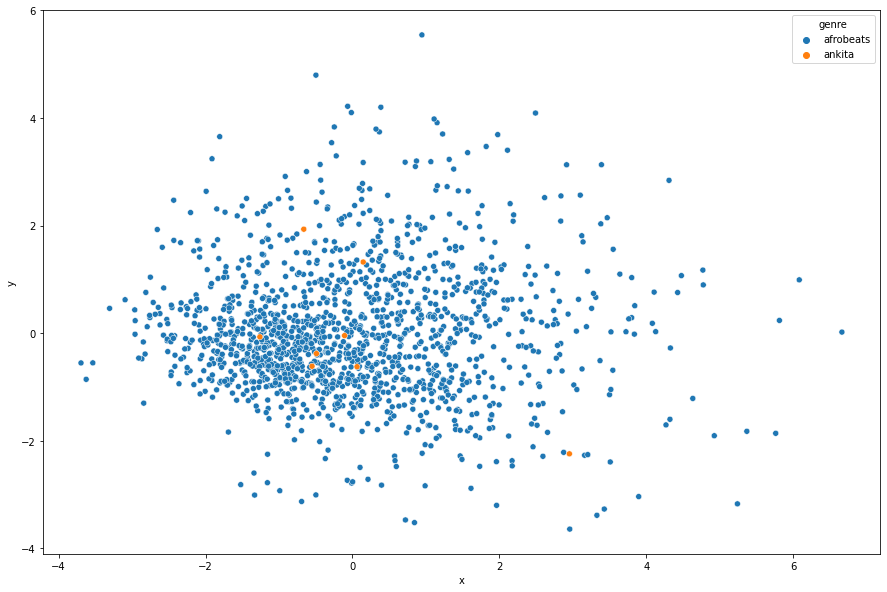

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=pca_df['x'], y=pca_df['y'], hue=pca_df['genre'])

In [23]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('tsne', TSNE(n_components=2, verbose=False))
])
X_tnse = pipeline.fit_transform(X)


tsne_df = pd.DataFrame(columns=['x', 'y'], data=X_tnse)
tsne_df['genre'] = df['genre']
tsne_df['cluster'] = df['cluster']
tsne_df['track_name'] = df['track_name']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [24]:
tsne_df.head()

,x,y,genre,cluster,track_name
0,-37.797138,1.851698,afrobeats,9,Oleku (feat. Brymo)
1,22.425888,-4.684021,afrobeats,8,Move Back
2,26.332874,-23.782192,afrobeats,0,Pakurumo
3,18.120735,-18.084297,afrobeats,8,The Matter (feat. Wizkid)
4,-27.313440,20.854507,afrobeats,7,Slow Down (feat. Wiz Kid)


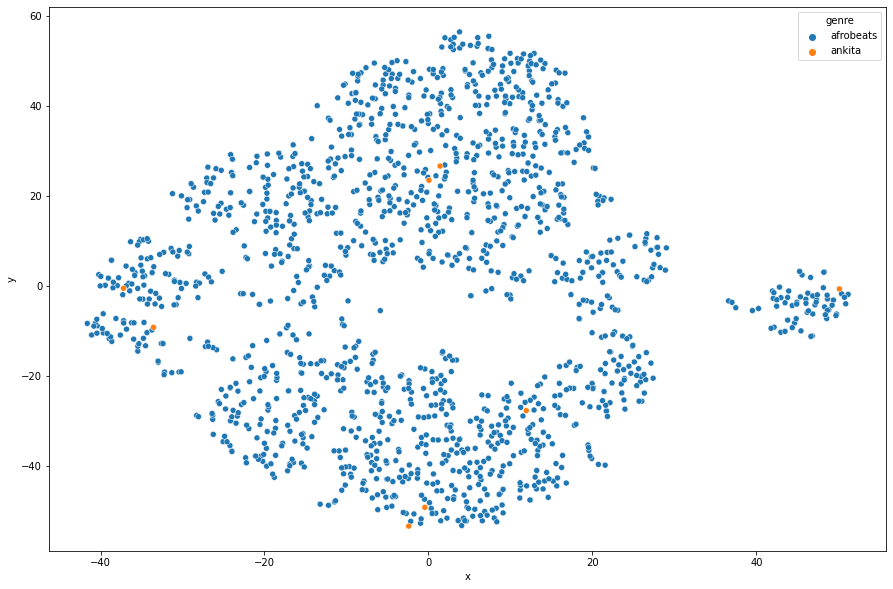

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=tsne_df['x'], y=tsne_df['y'], hue=tsne_df['genre']);

#### This function gives the songs in each cluster

In [26]:
tsne_df[tsne_df['genre']=='ankita']

,x,y,genre,cluster,track_name
1500,-0.442192,-49.195431,ankita,0,"Haan Main Galat (From ""Love Aaj Kal"")"
1501,-2.411004,-53.357372,ankita,3,Badal Pe Paon Hai
1502,1.416979,26.695173,ankita,2,Ziddi Dil
1503,-37.205997,-0.479640,ankita,9,Dangal
1504,11.927081,-27.671665,ankita,3,Pray For Me (with Kendrick Lamar)
1505,-33.548988,-9.170756,ankita,9,Blinding Lights
1506,50.129169,-0.621718,ankita,4,RAINY NIGHT IN TALLINN
1507,0.066030,23.535433,ankita,2,Zinda


In [27]:
X.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [28]:
def get_song(df,title):
    cluster = df.loc[df['track_name'] == title, 'cluster'].iloc[0]
    lst=[]
    for i in range(len(df)):
        if df.loc[i]['cluster'] == cluster:
            lst.append(df.loc[i]['track_name'])
    return lst, cluster

## Cosine similarity

In [29]:
X.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.544,0.730,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112
1,0.793,0.734,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032
2,0.879,0.737,-5.412,1,0.0421,0.525,0.005760,0.268,0.967,119.990
3,0.697,0.841,-6.782,1,0.2710,0.224,0.000000,0.336,0.808,103.070
4,0.520,0.717,-3.006,0,0.3890,0.116,0.000000,0.249,0.704,135.550


In [30]:
similarities = cosine_similarity(X)

In [31]:
similarities

array([[1.        , 0.99885823, 0.99977449, ..., 0.9999434 , 0.99762504,
        0.99917263],
       [0.99885823, 1.        , 0.99953946, ..., 0.99917993, 0.99969244,
        0.99996123],
       [0.99977449, 0.99953946, 1.        , ..., 0.99990238, 0.99870536,
        0.99971158],
       ...,
       [0.9999434 , 0.99917993, 0.99990238, ..., 1.        , 0.99818375,
        0.99944682],
       [0.99762504, 0.99969244, 0.99870536, ..., 0.99818375, 1.        ,
        0.99954636],
       [0.99917263, 0.99996123, 0.99971158, ..., 0.99944682, 0.99954636,
        1.        ]])

In [32]:
recommender_df = pd.DataFrame(similarities,
                              columns=df['track_name'],
                             index=df['track_name']).drop(ankita['track_name'])

In [33]:
recommender_df

track_name,Oleku (feat. Brymo),Move Back,Pakurumo,The Matter (feat. Wizkid),Slow Down (feat. Wiz Kid),Like to Party,Yahooze,Bumper To Bumper,Dami Duro,Gongo Aso,...,Be Honest (feat. Burna Boy),Donne-moi l’accord,"Haan Main Galat (From ""Love Aaj Kal"")",Badal Pe Paon Hai,Ziddi Dil,Dangal,Pray For Me (with Kendrick Lamar),Blinding Lights,RAINY NIGHT IN TALLINN,Zinda
track_name,,,,,,,,,,,,,,,,,,,,,
Oleku (feat. Brymo),1.000000,0.998858,0.999774,0.999164,0.999987,0.999251,0.999216,0.998757,0.999778,0.999933,...,0.999102,0.999212,0.999726,0.997845,0.998789,0.999997,0.999672,0.999943,0.997625,0.999173
Move Back,0.998858,1.000000,0.999539,0.999910,0.998647,0.999889,0.999903,0.999984,0.997677,0.998740,...,0.999970,0.999941,0.999611,0.999785,0.999979,0.998952,0.999628,0.999180,0.999692,0.999961
Pakurumo,0.999774,0.999539,1.000000,0.999779,0.999683,0.999807,0.999798,0.999463,0.999186,0.999790,...,0.999687,0.999752,0.999988,0.998925,0.999490,0.999806,0.999962,0.999902,0.998705,0.999712
The Matter (feat. Wizkid),0.999164,0.999910,0.999779,1.000000,0.998992,0.999990,0.999992,0.999883,0.998159,0.999162,...,0.999944,0.999946,0.999832,0.999667,0.999897,0.999241,0.999844,0.999471,0.999511,0.999942
Slow Down (feat. Wiz Kid),0.999987,0.998647,0.999683,0.998992,1.000000,0.999085,0.999044,0.998533,0.999862,0.999933,...,0.998912,0.999037,0.999625,0.997558,0.998571,0.999974,0.999564,0.999894,0.997315,0.998990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vex Oh (feat. Eight9FLY),0.997875,0.999796,0.998938,0.999675,0.997592,0.999632,0.999653,0.999840,0.996341,0.997812,...,0.999703,0.999623,0.999070,0.999993,0.999830,0.998008,0.999122,0.998389,0.999934,0.999667
God's Work (feat. iLL BLU),0.999856,0.999491,0.999955,0.999679,0.999781,0.999721,0.999711,0.999423,0.999325,0.999800,...,0.999661,0.999732,0.999945,0.998763,0.999455,0.999887,0.999915,0.999924,0.998559,0.999695
JA ARA E,0.999259,0.999853,0.999832,0.999985,0.999099,0.999981,0.999992,0.999825,0.998319,0.999285,...,0.999916,0.999935,0.999883,0.999586,0.999850,0.999332,0.999884,0.999550,0.999403,0.999921


#### Create a function to predict top ten Afrobeats songs based on the playlist given

In [57]:
recommender_df['Zinda'].sort_values(ascending=False).index[0:10]

Index(['Blow My Mind', 'Yawa (feat. Sarkodie)', 'Ginger (feat. Burna Boy)',
       'Know Your Worth (feat. Davido & Tems)', 'Let It Go - DJ Boat Remix',
       'Abena', 'Bounce It', 'Jabole', 'Ogaranya', 'Attention'],
      dtype='object', name='track_name')

In [63]:
def recommend_(track_names):
    top_10 = pd.DataFrame()
    lst = []
    for track in track_names:
        most_similar = recommender_df[track].sort_values(ascending=False).index[0]
        print(track)
        lst.append(most_similar)
    return lst

In [64]:
recommend_(ankita['track_name'])

Haan Main Galat (From "Love Aaj Kal")
Badal Pe Paon Hai
Ziddi Dil
Dangal
Pray For Me (with Kendrick Lamar)
Blinding Lights
RAINY NIGHT IN TALLINN
Zinda


['Little Bit More',
 'Italy (feat. Blaq Diamond)',
 'Understanding Love - Extended',
 'My Darlina',
 'Onyeka (Baby)',
 'Lady',
 'Sugar Daddy',
 'Blow My Mind']

In [61]:
def recommend_afrobeats(track_names):
    top_ten_df = pd.DataFrame(columns=df.columns)
    top_ten_list = []
    
    for track in track_names:
        
        for count in range(len(df)): 
            most_similar = recommender_df[track].sort_values(ascending=False).index[count]
            print(count)
            print(most_similar)
            
            if most_similar in top_ten_list:
               
                
                continue
            
            else:
                top_ten_list.append(most_similar)
                break
                
        
        top_ten_df = pd.concat([top_ten_df, df[df['track_name']==most_similar]])
        
    return top_ten_df

In [62]:
recommend_afrobeats(ankita['track_name'])

0
Little Bit More
0
Italy (feat. Blaq Diamond)
0
Understanding Love - Extended
0
My Darlina
0
Onyeka (Baby)
0
Lady
0
Sugar Daddy
0
Blow My Mind


,track_name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,cluster
123,Little Bit More,0.722,0.728,-4.999,1,0.0388,0.0308,0.000021,0.1,0.654,104.994,afrobeats,3
309,Italy (feat. Blaq Diamond),0.837,0.693,-10.26,1,0.0601,0.172,0.000003,0.103,0.787,112.969,afrobeats,3
1096,Understanding Love - Extended,0.696,0.682,-7.064,0,0.0648,0.131,0.000009,0.152,0.591,95.987,afrobeats,2
753,My Darlina,0.657,0.749,-5.419,0,0.272,0.463,0.0614,0.15,0.66,194.228,afrobeats,9
529,Onyeka (Baby),0.825,0.685,-5.21,1,0.0776,0.155,0.00977,0.102,0.304,102.03,afrobeats,3
1002,Lady,0.529,0.712,-6.42,1,0.0566,0.309,0.0826,0.0818,0.595,194.057,afrobeats,9
1386,Sugar Daddy,0.91,0.559,-10.883,1,0.0876,0.0205,0.509,0.103,0.412,114.005,afrobeats,4
263,Blow My Mind,0.52,0.644,-7.09,0,0.0783,0.129,0.000235,0.107,0.6,103.646,afrobeats,2
